In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from xgboost import XGBClassifier

In [94]:
df = pd.read_csv("./2019-Oct-depth-target.csv")

In [95]:
df.drop(["Unnamed: 0", "Unnamed: 0.1", "event_type", "category_code"], axis=1, inplace=True)

In [96]:
def in_cart_but_not_purchased(is_purchased):
    if is_purchased:
        return 0
    else:
        return 1

df["target"] = df["is_purchased"].apply(in_cart_but_not_purchased)

In [97]:
df = df.drop("is_purchased", axis=1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1)
                                                    , df["target"]
                                                    , test_size = 0.2
                                                    , random_state = 42
                                                    )

In [99]:
k = 5

pipe = make_pipeline(
    OrdinalEncoder()
    , SimpleImputer()
    , RandomForestClassifier(random_state=42)
)
parameters = {
    'randomforestclassifier__max_depth': range(1, 20, 2),
    'randomforestclassifier__max_features': range(1, 20, 2),
    'randomforestclassifier__min_samples_leaf' : range(1, 20, 2)
}


rf_classifier = RandomizedSearchCV(
    pipe,
    param_distributions=parameters,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    verbose=1,
)

rf_classifier.fit(X_train, y_train)
pipe_rf = rf_classifier.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "D:\WORKPLAC

In [100]:
y_pred = pipe_rf.predict(X_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))

Accuracy : 0.6021847769218279
Precision : 0.63818792108377
Recall : 0.47578583516364814


In [101]:
pipe = make_pipeline(
    OrdinalEncoder()
    , SimpleImputer()
    , DecisionTreeClassifier(random_state=42, criterion='entropy')
)

parameters = {
    'decisiontreeclassifier__max_depth': range(1, 20, 2),
    'decisiontreeclassifier__max_features': range(1, 20, 2),
    'decisiontreeclassifier__min_samples_leaf' : range(1, 20, 2)
}


dt_classifier = RandomizedSearchCV(
    pipe,
    param_distributions=parameters,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    verbose=1,
)

dt_classifier.fit(X_train, y_train)
pipe_dt = dt_classifier.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\WORKPLACE\PYTHON\AI09\venv\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\WORKPLACE\PYTHON

In [102]:
y_pred = pipe_dt.predict(X_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))

Accuracy : 0.5908279059697992
Precision : 0.6027850655903129
Recall : 0.5377164872358046


In [103]:
pipe = make_pipeline(
    OrdinalEncoder()
    , SimpleImputer(strategy='median')
    , XGBClassifier(n_estimators=200
                    , random_state=42
                    , n_jobs=-1
                    , use_label_encoder=False
                    , eval_metric='mlogloss'
                    )
)

parameters = {
    'xgbclassifier__max_depth': range(1, 20, 2),
    'xgbclassifier__learning_rate': [0.1, 0.2, 0.3],
}


xgb_classifier = RandomizedSearchCV(
    pipe,
    param_distributions=parameters,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    verbose=1,
)

xgb_classifier.fit(X_train, y_train)
pipe_xg = xgb_classifier.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [104]:
y_pred = pipe_xg.predict(X_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))

Accuracy : 0.6109347092677119
Precision : 0.6445049700863654
Recall : 0.49843373060166346


In [128]:
import shap
import xgboost
from pdpbox.pdp import pdp_isolate, pdp_plot
plt.rcParams['figure.dpi'] = 144

In [148]:
print('Best Parameters: ', rf_classifier.best_params_)

Best Parameters:  {'randomforestclassifier__min_samples_leaf': 9, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__max_depth': 5}


In [149]:
pipe_plot = make_pipeline(
        OrdinalEncoder()
        , SimpleImputer()
        , RandomForestClassifier(random_state=42, min_samples_leaf=9, max_features=3, max_depth=5)
    )

model = pipe_plot.fit(X_train, y_train)

In [138]:
df

,event_time,product_id,category_id,brand,price,user_id,user_session,depth1,depth2,in_cart,target
0,2019-10-01 00:09:33 UTC,1002524,2053013555631882655,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,electronics,smartphone,4,0
1,2019-10-01 00:11:00 UTC,4804056,2053013554658804075,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,electronics,headphone,4,1
2,2019-10-01 02:17:59 UTC,1004833,2053013555631882655,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,electronics,smartphone,7,1
3,2019-10-01 02:19:36 UTC,1005003,2053013555631882655,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,electronics,smartphone,16,0
4,2019-10-01 02:19:43 UTC,1004750,2053013555631882655,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,electronics,smartphone,10,0
...,...,...,...,...,...,...,...,...,...,...,...
554283,2019-10-31 23:52:56 UTC,1004767,2053013555631882655,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone,5,0
554284,2019-10-31 23:52:57 UTC,1004870,2053013555631882655,samsung,275.25,550884173,32e8b23e-4bb6-4b67-b2eb-6f421dfd110a,electronics,smartphone,2,1
554285,2019-10-31 23:55:07 UTC,1005134,2053013555631882655,apple,1889.07,566280291,20715c6f-d6fc-4ed4-9d48-c7c2b5d03602,electronics,smartphone,3,1
554286,2019-10-31 23:55:14 UTC,1003306,2053013555631882655,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone,4,0


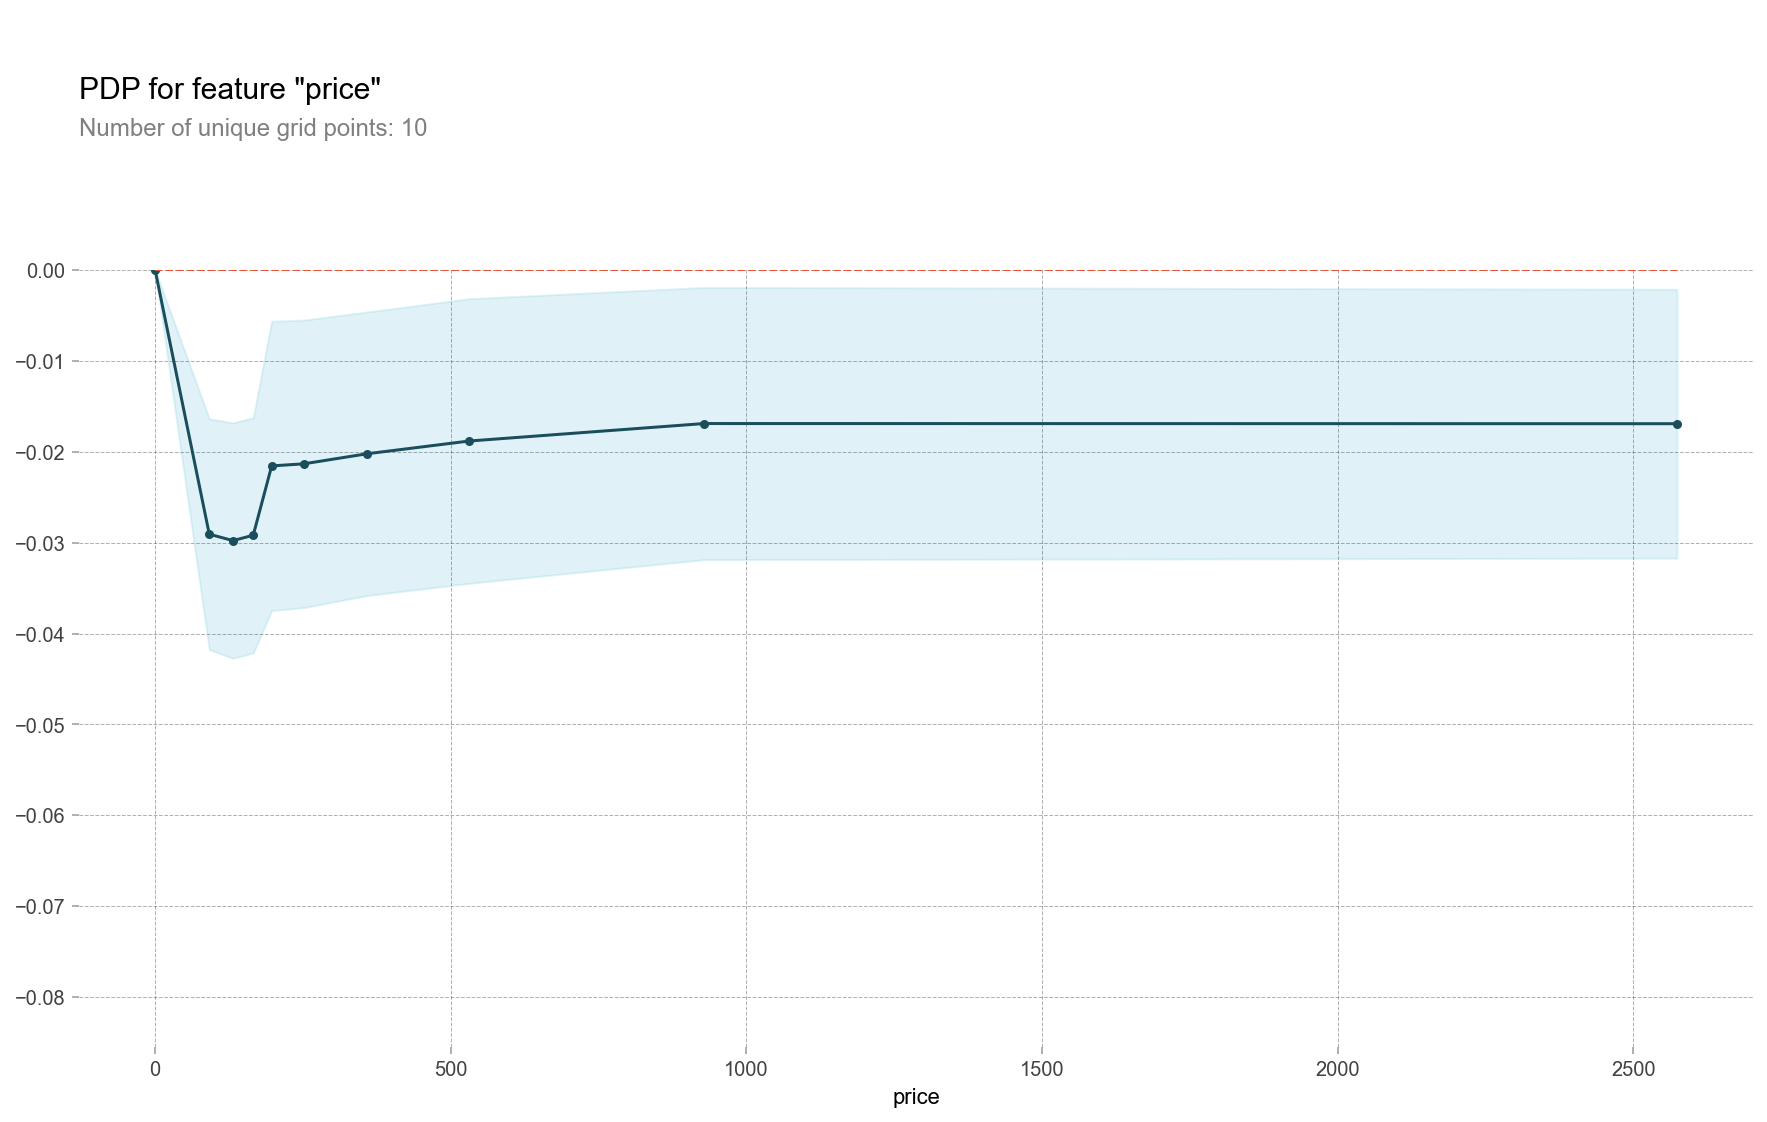

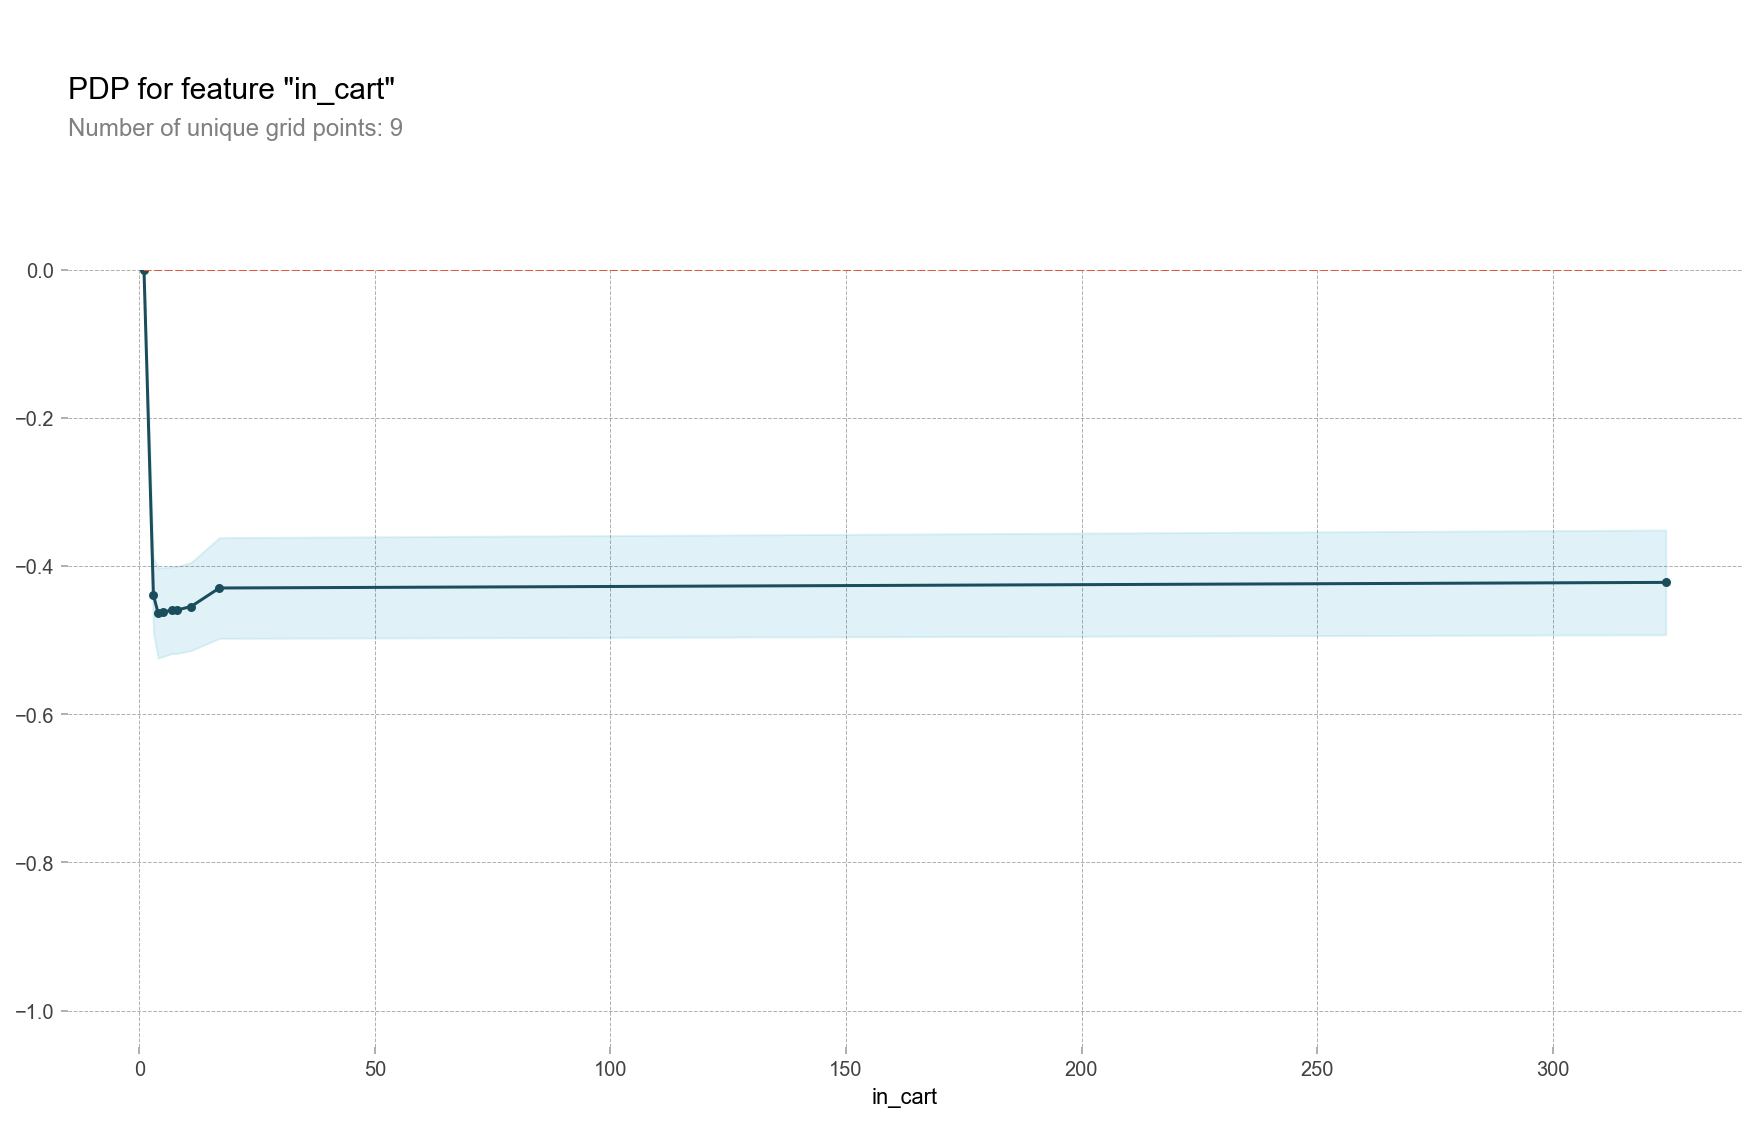

In [150]:
features = ["price", "in_cart"]
for i in features:
    isolated = pdp_isolate(
        model=model,
        dataset=X_train,
        model_features=X_train.columns,
        feature=i
    )
    pdp_plot(isolated, feature_name=i)